# The Deep Learning Model

## Step-1--> Load The Preprocessed Data

In [45]:
#import libraries
import os
import numpy as np
import pandas as pd
import cv2
import gc
from tqdm import tqdm
from glob import glob

In [46]:
# Load The Preprocessed Data
data = np.load('./data/data_preprocess1.npz')

In [47]:
X = data['arr_0']
y = data['arr_1']

In [48]:
X.shape , y.shape

((9959, 100, 100, 3), (9959,))

In [49]:
np.unique(y)

array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
      dtype='<U15')

In [50]:
from sklearn.preprocessing import OneHotEncoder

In [51]:
onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1,1))

In [52]:
y_array = y_onehot.toarray()

In [53]:
y_array.shape

(9959, 4)

# Step-2 --> Split The Data in Train and Test Data

In [54]:
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train , y_test = train_test_split(X,y_array,test_size=0.2,random_state=42)

In [55]:
x_train.shape , x_test.shape ,y_train.shape , y_test.shape

((7967, 100, 100, 3), (1992, 100, 100, 3), (7967, 4), (1992, 4))

# Step-3 --> Convolotional Neural Network

In [56]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [57]:
model = Sequential([
    layers.Conv2D(filters=16,kernel_size=3,padding='same',input_shape=(100,100,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32,3,padding='same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64,3,padding='same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(192,activation='relu'),
    layers.Dense(28,activation='relu'),
    layers.Dense(4,activation='sigmoid')
    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)             

# Step-4--> Training the model

In [59]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=30,epochs=10)

Epoch 1/10


2022-05-15 20:28:32.331738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


265/266 [============================>.] - ETA: 0s - loss: 0.2270 - accuracy: 0.9175

2022-05-15 20:28:38.938901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


266/266 [==============================] - 7s 26ms/step - loss: 0.2267 - accuracy: 0.9175 - val_loss: 0.1161 - val_accuracy: 0.9598
Epoch 2/10
266/266 [==============================] - 7s 25ms/step - loss: 0.0635 - accuracy: 0.9779 - val_loss: 0.0650 - val_accuracy: 0.9799
Epoch 3/10
266/266 [==============================] - 7s 25ms/step - loss: 0.0424 - accuracy: 0.9846 - val_loss: 0.1188 - val_accuracy: 0.9639
Epoch 4/10
266/266 [==============================] - 7s 25ms/step - loss: 0.0262 - accuracy: 0.9908 - val_loss: 0.0626 - val_accuracy: 0.9824
Epoch 5/10
266/266 [==============================] - 7s 25ms/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0513 - val_accuracy: 0.9874
Epoch 6/10
266/266 [==============================] - 7s 25ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0811 - val_accuracy: 0.9819
Epoch 7/10
266/266 [==============================] - 7s 26ms/step - loss: 0.0239 - accuracy: 0.9917 - val_loss: 0.0685 - val_accuracy: 0.9839
Epoch 8/10

In [60]:
import pandas as pd
import matplotlib.pyplot as plt


In [61]:
history_df=pd.DataFrame(history.history)

In [62]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.226698,0.917535,0.116074,0.959839
1,0.063494,0.977909,0.065044,0.979920
2,0.042367,0.984561,0.118826,0.963856
3,0.026243,0.990837,0.062587,0.982430
4,0.017777,0.994352,0.051311,0.987450
5,0.010744,0.996611,0.081122,0.981928
6,0.023862,0.991716,0.068526,0.983936
7,0.011764,0.995732,0.083001,0.981426
8,0.001573,0.999749,0.078020,0.986948
9,0.000679,1.000000,0.081280,0.987450


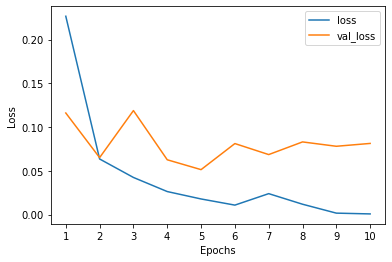

In [63]:
history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

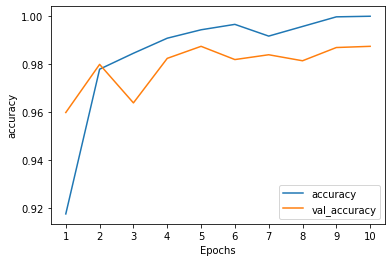

In [64]:
history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.xticks(list(range(10)),list(range(1,11)))
plt.show()

In [65]:
model.save('face_cnn_model')

INFO:tensorflow:Assets written to: face_cnn_model/assets


In [66]:
onehot.categories_

[array(['Mask', 'Mask_Chin', 'Mask_Mouth_Chin', 'Mask_Nose_Mouth'],
       dtype='<U15')]